In [134]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science','notebook','grid'])
import sympy as sp
import random
from IPython.display import display, Math

from IPython.core.display import Latex
from sympy import *
    

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

# Problem 1

### Problem 1.1

In [135]:
def simulate_pushup_days(num_pushup_days):
    waiting_times = []
    pushups_per_day = []
    
    days = 0
    while len(waiting_times) < num_pushup_days:
        roll = random.randint(1,6)
        if roll == 6:
            waiting_times.append(days)

            pushups = sum(1 for _ in range(120) if random.randint(1,6) == 6)
            pushups_per_day.append(pushups)

            days = 0
        else:
            days += 1

    return np.array(waiting_times), np.array(pushups_per_day)

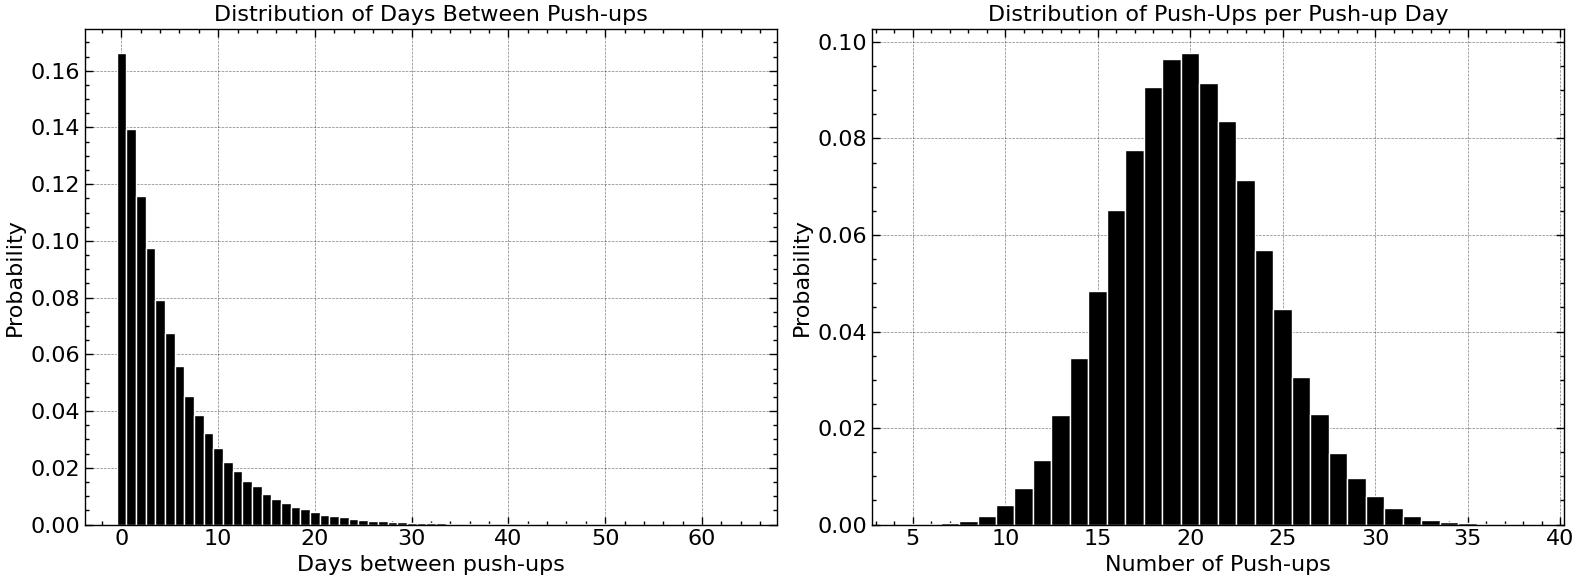

In [136]:
#Distribution of days between push-ups

waiting_times, pushups_per_day = simulate_pushup_days(100000)

plt.figure(figsize = (16,6))
d_waiting_times                       =   np.diff(np.unique(waiting_times)).min()
d_pushups_per_day                     =   np.diff(np.unique(pushups_per_day)).min()
left_of_first_bin_waiting_times       =   waiting_times.min() - float(d_waiting_times)/2
right_of_first_bin_waiting_times      =   waiting_times.max() + float(d_waiting_times)/2
left_of_first_bin_pushups_per_day     =   pushups_per_day.min() - float(d_pushups_per_day)/2
right_of_first_bin_pushups_per_day    =   pushups_per_day.max() + float(d_pushups_per_day)/2

plt.subplot(1,2,1)
plt.hist(waiting_times, bins = np.arange(left_of_first_bin_waiting_times, right_of_first_bin_waiting_times + d_waiting_times, d_waiting_times), density=True,
         edgecolor = 'white', color = 'black')
plt.title("Distribution of Days Between Push-ups")
plt.xlabel("Days between push-ups")
plt.ylabel("Probability")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.subplot(1,2,2)
plt.hist(pushups_per_day, bins = np.arange(left_of_first_bin_pushups_per_day, right_of_first_bin_pushups_per_day + d_pushups_per_day, d_pushups_per_day), density=True, 
         edgecolor = 'white', color = 'black')
plt.title("Distribution of Push-Ups per Push-up Day")
plt.xlabel("Number of Push-ups")
plt.ylabel("Probability")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.tight_layout()
plt.savefig('Problem 1.1.1.png', dpi = 300)

In [137]:
#Mean, median, and standard deviation of number of push-ups in 10 days
def simulate_pushups(num_days):
    pushups_per_day = []

    for _ in range(num_days):
        roll = random.randint(1,6)

        if roll == 6:
            pushups = sum(1 for _ in range(120) if random.randint(1,6) == 6)
        
        else:
            pushups = 0

        pushups_per_day.append(pushups)

    return np.array(pushups_per_day)

In [138]:
#Simulation
N_experiments = 150000
totals = []

for _ in range(N_experiments):
    pushups = simulate_pushups(10)
    totals.append(pushups.sum())

totals = np.array(totals)

display(Math(fr"\mu = {np.mean(totals):.2f}"))
display(Math(fr"Median = {np.median(totals):.2f}"))
display(Math(fr"\sigma =  {np.std(totals):.2f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

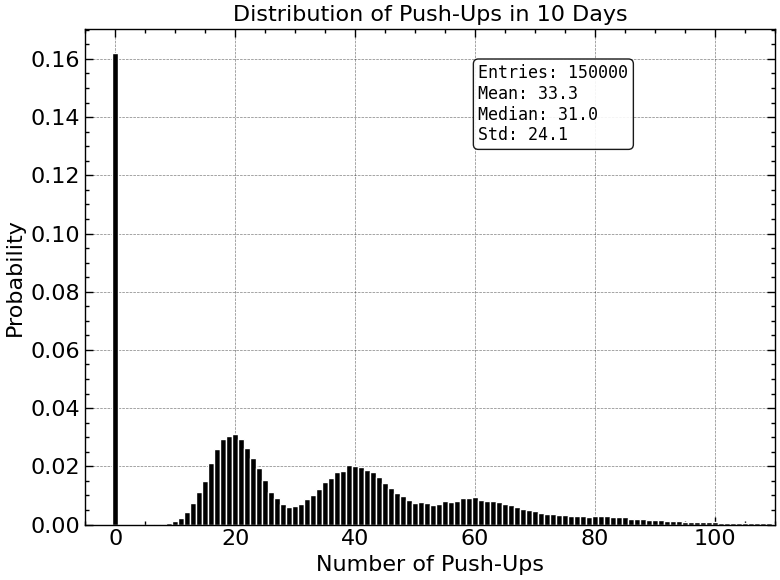

In [139]:
plt.figure(figsize=(8,6))

d_totals = np.diff(np.unique(totals)).min()
left_of_first_bin_totals = totals.min() - d_totals/2
right_of_first_bin_totals = totals.max() + d_totals/2

plt.subplot(1,1,1)
plt.hist(totals, bins=np.arange(left_of_first_bin_totals, right_of_first_bin_totals + d_totals, d_totals), density=True, edgecolor='white', color='black')
plt.xlim(-5, 110)
plt.title("Distribution of Push-Ups in 10 Days")
plt.xlabel("Number of Push-Ups")
plt.ylabel("Probability")

mu = np.mean(totals)
med = np.median(totals)
sigma = np.std(totals)
entries = len(totals)

plot_info = [
    f"Entries: {entries}",
    f"Mean: {mu:.1f}",
    f"Median: {med:.1f}",
    f"Std: {sigma:.1f}",
]

plt.text(
    0.57, 0.93,
    "\n".join(plot_info),
    transform=plt.gca().transAxes,
    fontsize=12,
    family='monospace',
    verticalalignment='top',
    bbox=dict(
        facecolor='white',      
        edgecolor='black',      
        boxstyle='round,pad=0.3', 
        alpha=0.9               
    )
)

plt.tight_layout()
plt.savefig('Problem 1.1.2.png', dpi = 300)

# Problem 2

### Problem 2.1

In [140]:
mu_r_earth   =  149*10e-06
sig_r_earth  =  3*10e-06
mu_r_sun     =  25*10e-06
sig_r_sun    =  5*10e-06
mu_r_comet   =  309*10e-06
sig_r_comet  =  20*10e-06

In [141]:
# Define variables:
f, r_earth,r_sun,r_comet = symbols("f, r_e, r_s, r_C")
df,dr_earth,dr_sun,dr_comet = symbols("sigma_f, sigma_e, sigma_s, sigma_c")

f = (r_earth - r_comet)/(r_sun - r_comet)
lprint(latex(Eq(symbols('f'),f)))

# Calculate uncertainty and print:
df = sqrt((f.diff(r_earth) * dr_earth)**2 + (f.diff(r_sun) * dr_sun)**2 + (f.diff(r_comet) * dr_comet)**2)
lprint(latex(Eq(symbols('sigma_f'), df)))

# Turn expression into numerical functions 
ff = lambdify((r_earth,r_sun, r_comet),f)
fdf = lambdify((r_earth,dr_earth,r_sun,dr_sun,r_comet, dr_comet),df)

# Numerically evaluate expressions and print 
vf = ff(mu_r_earth,mu_r_sun,mu_r_comet)
vdf = fdf(mu_r_earth,sig_r_earth,mu_r_sun,sig_r_sun,mu_r_comet,sig_r_comet)
lprint(fr'f = {vf:.2f} \pm {vdf:.2f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.2

In [142]:
mu_N   =  1971
sig_N  =  np.sqrt(1971)
mu_t   =  98.4
sig_t  =  3.7

In [143]:
# Define variables:
r, N, t = symbols("r, N, t")
dr, dN, dt = symbols("sigma_r, sigma_N, sigma_t")

r = N/t
lprint(latex(Eq(symbols('r'),r)))

dr= sqrt((r.diff(N) * dN)**2 + (r.diff(t) * dt)**2)
lprint(latex(Eq(symbols('sigma_r'), dr)))

fr = lambdify((N, t),r, 'numpy')
fdr = lambdify((N, dN, t, dt),dr, 'numpy')

vr = fr(mu_N, mu_t)
vdr = fdr(mu_N, sig_N, mu_t, sig_t)
lprint(fr'r = {vr:.1f} \pm {vdr:.1f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>